Paddle-OCR Installation

In [1]:
!python -m pip install paddlepaddle-gpu==2.0.0 -i https://mirror.baidu.com/pypi/simple

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try 'pacman -S
    python-xyz', where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Arch-packaged Python package,
    create a virtual environment using 'python -m venv path/to/venv'.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip.
    
    If you wish to install a non-Arch packaged Python application,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. Make sure you have python-pipx
    installed via pacman.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detailed specification.


In [2]:
%pip install paddleocr

  Using cached paddleocr-2.6.1.3-py3-none-any.whl (445 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 4.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 4.5 MB/s eta 0:00:00a 0:00:01
  Using cached python-docx-0.8.11.tar.gz (5.6 MB)
  Preparing metadata (setup.py) ... done
  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached opencv_python-4.6.0.66-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.9 MB)
  Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 4.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 5.2 MB/s eta 0:00:0000:0100:01
  Using cached visualdl-2.5.3-py3-none-any.whl (6.3 MB)
  Using cached attrdict-2.0.1-py2.py3-none-any.whl (9.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 5.3

In [5]:
%pip install paddlepaddle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.7/121.7 MB 3.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 2.7 MB/s eta 0:00:0000:0100:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.3
    Uninstalling protobuf-4.23.3:
      Successfully uninstalled protobuf-4.23.3

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip3.10 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Importing necessary packages

In [1]:
from matplotlib import pyplot as plt
import cv2
import os
import re

In [2]:
from paddleocr import PaddleOCR, draw_ocr

ocr = PaddleOCR(lang = 'en')

[2023/06/27 14:58:46] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\user/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\user/.paddleocr/whl\\rec\\en\\en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_

Dealing with multiple images

In [3]:

def extract_aadhar_info(confidence_threshold):
    image_directory = r"<enter path to directory containing aadhar card images>"
    name_num = []  
    
    for filename in os.listdir(image_directory):
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            img_path = os.path.join(image_directory, filename)
            print("PATH:", img_path)
            
            
            result = ocr.ocr(img_path)
            extracted_numbers = [] 
            for res in result:
                for line in res:
                    text = line[1][0]
                    confidence = line[1][1]
                    
                    matches = re.findall(r'\b(\d{4}\s?\d{4}\s?\d{4}|\d{8}\s?\d{4}|\d{4}\s?\d{8}|\d{12})\b', text)
                    if matches:
                        extracted_numbers.extend(matches)
            
            
            result = ocr.ocr(img_path)
            extracted_names = [res[i][1][0] for i in range(0, len(result[0]), 1) for res in result if res[i][1][1] >= confidence_threshold]
            
            
            if len(extracted_names) >= 2:
                name_num.append({"Name": extracted_names[1], "Number": extracted_numbers[-1]})
    
    return name_num

# Usage:

In [4]:
name_num = extract_aadhar_info(0.83)


PATH: C:\Users\user\OneDrive\Alan\Alan's Files\Internship\AadharCard-Details-Extractor\aadhar_dataset\card6.png
[2023/06/27 14:59:02] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/06/27 14:59:03] ppocr DEBUG: dt_boxes num : 8, elapse : 0.2643401622772217
[2023/06/27 14:59:04] ppocr DEBUG: rec_res num  : 8, elapse : 1.7029242515563965
[2023/06/27 14:59:04] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/06/27 14:59:05] ppocr DEBUG: dt_boxes num : 8, elapse : 0.20311355590820312
[2023/06/27 14:59:06] ppocr DEBUG: rec_res num  : 8, elapse : 1.6311135292053223
PATH: C:\Users\user\OneDrive\Alan\Alan's Files\Internship\AadharCard-Details-Extractor\aadhar_dataset\card7.png
[2023/06/27 14:59:06] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[202

In [5]:
for item in name_num:
    print("Name:", item["Name"])
    print("AadharNumber:", item["Number"])
    print() 
print(len(name_num)) 

Name: Md Tomba
AadharNumber: 9284 9436 2499

Name: Name XXXX
AadharNumber: 0000 1111 2222

Name: NAJMA KHATUN
AadharNumber: 4072 6523 3592

3


Single Image

In [6]:
def AadharDetailsExtractor():
    path = r"<enter path to directory containing aadhar card images>"
    img_path_2 = os.path.join(path, '<filename>')
    result = ocr.ocr(img_path_2)
    print()
    print("The data extracted from Aadhar-Card: ")
    print()
    for res in result:
        for i in range(0,len(result[0]),1):
            print(res[i][1][0])
    text = [res[i][1][0] for i in range(0, len(result[0]), 1) for res in result]
    box = [res[0][0] for i in range(0, len(result[0]), 1) for res in result]
    scores = [res[i][1][1] for i in range(0, len(result[0]), 1)  for res in result]
    font_path = os.path.join('PaddleOCR','doc','fonts','latin.ttf')
    img = cv2.imread(img_path_2)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15,15))
    annotated = draw_ocr(img,box,text,scores,font_path=font_path)
    plt.imshow(annotated)


[2023/06/27 14:59:42] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/06/27 14:59:43] ppocr DEBUG: dt_boxes num : 12, elapse : 0.23315095901489258
[2023/06/27 14:59:45] ppocr DEBUG: rec_res num  : 12, elapse : 2.567250967025757

The data extracted from Aadhar-Card: 

Government of India
NAJMA KHATUN
Father:UMMAR ALI MIYA
/Year of Birth1994
/Female
4072 6523 3592


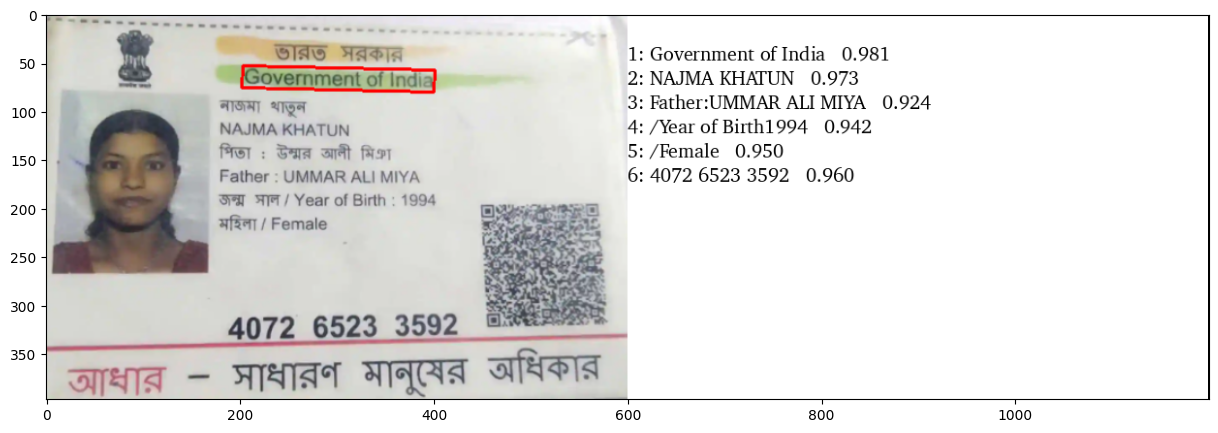

In [7]:
AadharDetailsExtractor()

Regular Expressions

In [44]:
import re
x =[]
sample = ['1234 5678 1234','12345678 1234','1234 56781234','123456781234']
for t in sample:
    
    matches = re.findall(r'\d{4} \d{4} \d{4}|\d{8} \d{4}|\d{4} \d{8}|\d{12}', t)
    x.extend(matches)
for number in x:
    print(number)


1234 5678 1234
12345678 1234
1234 56781234
123456781234


Voters Identity Card

In [33]:
import os
import cv2
import matplotlib.pyplot as plt
from langdetect import detect
from paddleocr import PaddleOCR
import re
import os
import cv2
import matplotlib.pyplot as plt
from langdetect import detect
from paddleocr import PaddleOCR
import traceback
filtered_numbers=[]

def votersid_extraction(confidence_threshold=0.88):
    path = r"<enter path to directory containing voters id-card images>"
    img_path_2 = os.path.join(path, 'card3.png')
    ocr = PaddleOCR(lang='en')
   
    result = ocr.ocr(img_path_2)
    print()
    print("The data extracted from Voters-Card: ")
    print()
    for res in result:
        for i in range(0, len(result[0]), 1):
            word = res[i][1][0]
            confidence = res[i][1][1]
            if confidence >= confidence_threshold:
                print(word)
    for res in result:
                for line in res:
                    text = line[1][0]
                    matches = re.findall(r'^[A-Za-z]{3}\d{7}$', text)
                    if matches:
                        filtered_numbers.extend(matches)
    print("The EPIC number is the voters Id card is :", filtered_numbers[0])
    

In [34]:
votersid_extraction(0.88)

[2023/06/22 16:16:42] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\user/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\user/.paddleocr/whl\\rec\\en\\en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_

Epic number extraction for multiple Voters ID :

In [10]:

import cv2
import matplotlib.pyplot as plt
from langdetect import detect
from paddleocr import PaddleOCR
import re
import os
import cv2
import matplotlib.pyplot as plt
from langdetect import detect
from paddleocr import PaddleOCR
import traceback
filtered_numbers = []
def epicNumbers(confidence_threshold=0.88):
    image_directory = r"<enter path to directory containing votersid card images>"
    
    for filename in os.listdir(image_directory):
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            img_path = os.path.join(image_directory, filename)
            print("PATH:",img_path)
            result = ocr.ocr(img_path)
            for res in result:
                for line in res:
                    text = line[1][0]
                    matches = re.findall(r'^[A-Za-z]{3}\d{7}$', text)
                    if matches:
                        filtered_numbers.extend(matches)
    print()
    print("The EPIC number's in the voters Id card's are :", filtered_numbers)
            
    

In [11]:
epicNumbers(0.88)

PATH: C:\Users\user\OneDrive\Alan\Alan's Files\Internship\AadharCard-Details-Extractor\votersid_dataset\card2.jpeg
[2023/06/22 15:11:09] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/06/22 15:11:10] ppocr DEBUG: dt_boxes num : 14, elapse : 0.594268798828125
[2023/06/22 15:11:13] ppocr DEBUG: rec_res num  : 14, elapse : 3.783172130584717
PATH: C:\Users\user\OneDrive\Alan\Alan's Files\Internship\AadharCard-Details-Extractor\votersid_dataset\card3.png
[2023/06/22 15:11:13] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/06/22 15:11:14] ppocr DEBUG: dt_boxes num : 20, elapse : 0.1282649040222168
[2023/06/22 15:11:17] ppocr DEBUG: rec_res num  : 20, elapse : 2.9807567596435547

The EPIC number's in the voters Id card's are : ['KJC7967979', 'NOP1571827']


Bank Passbook

In [55]:
import cv2
import matplotlib.pyplot as plt
from langdetect import detect
from paddleocr import PaddleOCR
import re
import os
import cv2
import matplotlib.pyplot as plt
from langdetect import detect
from paddleocr import PaddleOCR
import traceback
filtered_numbers = []
def IFSC_Extraction(confidence_threshold=0.88):
    image_directory = r"<enter path to directory containing bank passbook images>"
   
    for filename in os.listdir(image_directory):
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            img_path = os.path.join(image_directory, filename)
            print("PATH:",img_path)
            result = ocr.ocr(img_path)
            for res in result:
                for line in res:
                    text = line[1][0]
                    matches = re.findall(r'^[A-Z]{4}0[A-Z0-9]{6}$', text)
                    if matches:
                        filtered_numbers.extend(matches)
    print()
    print("The IFSC Code in the Bank passbook's are :", filtered_numbers)
    
            

In [56]:
IFSC_Extraction(0.88)

PATH: C:\Users\user\OneDrive\Alan\Alan's Files\Internship\AadharCard-Details-Extractor\bank_dataset\card1.jpg
[2023/06/22 18:04:42] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/06/22 18:04:43] ppocr DEBUG: dt_boxes num : 19, elapse : 0.33974552154541016
[2023/06/22 18:04:52] ppocr DEBUG: rec_res num  : 19, elapse : 8.880395889282227

The IFSC Code in the Bank passbook's are : ['CNRB0002008']
